In [50]:
#https://www.analyticsvidhya.com/blog/2021/06/confusion-matrix-for-multi-class-classification/
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import training_configs

In [51]:
config= training_configs.seresnext50_config
df = pd.read_csv(config.train_csv)
df.head()

,image_id,data_provider,isup_grade,gleason_score
0,0005f7aaab2800f6170c399693a96917,karolinska,0,0+0
1,0005f7aaab2800f6170c399693a96917_0,karolinska,0,0+0
2,0005f7aaab2800f6170c399693a96917_1,karolinska,0,0+0
3,0005f7aaab2800f6170c399693a96917_2,karolinska,0,0+0
4,0005f7aaab2800f6170c399693a96917_3,karolinska,0,0+0


In [52]:
df = df.sample(frac=1).reset_index(drop=True)
df.head()


,image_id,data_provider,isup_grade,gleason_score
0,710e3f6901a5e7e1c97bcc64bdbfd39d_2,karolinska,1,3+3
1,46247d80557447a1ee718f12f1daba3c_3,karolinska,2,3+4
2,bd1a900e27cf317aa19176446e05df47_3,radboud,4,4+4
3,979f4dc560d37b8ed26dbc8064b85f18_1,karolinska,5,4+5
4,9bf048c56ab608b3020c7dd1a8120a73_0,karolinska,0,0+0


In [53]:
df_test= df[:df.shape[0]//10]
df_test.shape

(5306, 4)

In [54]:
df_test.head()

,image_id,data_provider,isup_grade,gleason_score
0,710e3f6901a5e7e1c97bcc64bdbfd39d_2,karolinska,1,3+3
1,46247d80557447a1ee718f12f1daba3c_3,karolinska,2,3+4
2,bd1a900e27cf317aa19176446e05df47_3,radboud,4,4+4
3,979f4dc560d37b8ed26dbc8064b85f18_1,karolinska,5,4+5
4,9bf048c56ab608b3020c7dd1a8120a73_0,karolinska,0,0+0


In [55]:
import tensorflow as tf
import tensorflow_addons
model=tf.keras.models.load_model("modelcheckpoints/{}/{}_full.h5".format(config.train_data_name,config.model_name))
#print(model.summary())

c:\Users\user\.julia\conda\3\lib\site-packages\keras\layers\core\lambda_layer.py:303: UserWarning: classification_models.models._common_blocks is not loaded, but a Lambda layer uses it. It may cause errors.
  function = cls._parse_function_from_config(config, custom_objects,


In [56]:
y=df_test['isup_grade']
y_pred= []

side = int(config.num_tiles ** 0.5)
input_size=(config.img_size*side,config.img_size*side,3) 
for image in df_test['image_id']:
        img_path = '{}/{}.png'.format(config.backbone_train_path, image)
        image= tf.keras.preprocessing.image.load_img(path=img_path,grayscale=False,color_mode="rgb",target_size=(config.img_size*side,config.img_size*side),interpolation='nearest')
        input=tf.keras.preprocessing.image.img_to_array(image)
        if(input.shape!=input_size):
            input=cv2.resize(input,input_size,interpolation=cv2.INTER_LANCZOS4)
        X=np.expand_dims(input/255.0, axis=0)
        prediction= model.predict(X)
        y_pred.append(np.argmax(prediction[0]))

1/1 [==============================] - 0s 98ms/step
[1, 4, 5, 4, 0, 0, 0, 0, 5, 1, 0, 0, 0, 1, 2, 0, 5, 5, 1, 4, 4, 4, 1, 0, 2, 5, 5, 1, 2, 2, 1, 1, 0, 5, 0, 0, 0, 5, 0, 5, 0, 3, 0, 5, 5, 5, 0, 1, 4, 0, 2, 0, 1, 4, 0, 2, 0, 1, 0, 1, 4, 0, 0, 0, 1, 1, 5, 5, 1, 4, 5, 4, 1, 5, 5, 5, 5, 1, 3, 0, 0, 5, 1, 2, 1, 0, 0, 1, 0, 0, 5, 1, 1, 5, 1, 0, 4, 0, 1, 0, 1, 0, 1, 3, 5, 1, 1, 1, 0, 1, 5, 0, 5, 0, 1, 5, 0, 0, 5, 1, 2, 2, 1, 1, 3, 0, 1, 5, 1, 4, 1, 5, 1, 1, 5, 5, 0, 5, 1, 2, 0, 1, 5, 0, 5, 0, 0, 5, 5, 4, 1, 0, 0, 0, 1, 0, 1, 0, 2, 0, 0, 1, 0, 0, 5, 1, 3, 0, 0, 3, 5, 1, 5, 1, 0, 0, 5, 0, 0, 5, 1, 0, 0, 5, 1, 0, 5, 5, 0, 0, 5, 1, 2, 0, 0, 0, 5, 0, 0, 3, 0, 5, 0, 2, 5, 5, 5, 1, 1, 2, 0, 0, 5, 1, 5, 5, 1, 0, 0, 0, 0, 0, 4, 0, 1, 0, 0, 5, 5, 5, 0, 0, 5, 1, 0, 1, 5, 0, 4, 0, 1, 4, 5, 0, 1, 5, 1, 0, 5, 1, 1, 1, 1, 0, 0, 5, 1, 4, 2, 0, 1, 1, 1, 0, 0, 1, 5, 1, 1, 0, 4, 0, 1, 3, 0, 0, 1, 0, 0, 0, 1, 5, 1, 5, 5, 1, 2, 1, 0, 0, 2, 0, 0, 5, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 5, 1, 0, 1, 3, 4, 5, 2, 2, 1, 0, 3,

In [57]:
from sklearn.metrics import confusion_matrix

cm= confusion_matrix(y,y_pred)

In [58]:
cm_df= pd.DataFrame(cm)


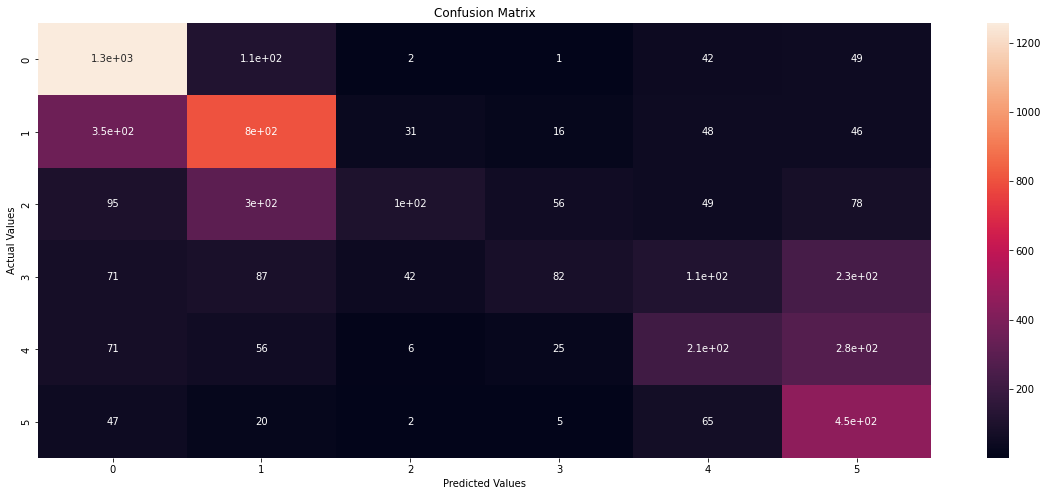

In [59]:
plt.figure(figsize=(20,8))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()